Setup Enviornment

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Download Data from Yahoo Finance API

In [8]:
#US Market
#SPY
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
spy = web.DataReader('spy','yahoo', start=start, end=end)
spy.to_csv(r'C:/data/spy.csv')

#S&P 500
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
sp500 = web.DataReader('^GSPC','yahoo', start=start, end=end)
sp500.to_csv(r'C:/data/S&P500.csv')

#Dow Jones
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
dji = web.DataReader('^DJI','yahoo', start=start, end=end)
dji.to_csv(r'C:/data/DowJones.csv')

#Nasdaq
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
nasdaq = web.DataReader('^IXIC','yahoo', start=start, end=end)
nasdaq.to_csv(r'C:/data/Nasdaq.csv')

#European Market
#CAC40
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
cac40 = web.DataReader('^FCHI','yahoo', start=start, end=end)
cac40.to_csv(r'C:/data/CAC40.csv')

#DAX Index
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
daxi = web.DataReader('^GDAXI','yahoo', start=start, end=end)
daxi.to_csv(r'C:/data/DAX.csv')

#Asian Market
#Hang Seng Index
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
hsi = web.DataReader('^HSI','yahoo', start=start, end=end)
hsi.to_csv(r'C:/data/HangSeng.csv')

#Nikkei 225
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
nikkei = web.DataReader('^N225','yahoo', start=start, end=end)
nikkei.to_csv(r'C:/data/Nikkei225.csv')

#All Ordinaries
start = dt.datetime(2002,1,1)
end = dt.datetime(2021,12,31)
aord = web.DataReader('^AORD','yahoo', start=start, end=end)
aord.to_csv(r'C:/data/Aord.csv')

Data Munging

In [17]:
# Due to the timezone issues, I extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2002-01-02,0.540001,NaN,NaN,NaN,NaN,NaN,NaN,-24.600098,-17.280273,NaN,115.110001
2002-01-03,1.519997,0.540001,6.590088,21.880005,52.169922,8.80957,19.920410,15.800049,74.719727,NaN,115.650002
2002-01-04,0.529999,1.519997,10.599976,74.770020,102.959961,75.94043,116.419922,NaN,155.140625,240.490234,117.169998
2002-01-07,-0.909996,0.529999,7.239990,13.409912,84.490234,-29.25000,35.799805,-21.100098,205.209961,138.910156,117.699997
2002-01-08,-0.110001,-0.909996,-7.619995,-35.819946,-65.570312,-79.19043,-116.169922,-9.300049,-67.480469,-146.370117,116.790001


In [18]:
# Check NaN values in indicepanel
indicepanel.isnull().sum()

spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40        50
daxi         88
aord        577
hsi         224
nikkei      301
Price         0
dtype: int64

In [19]:
# Forward filling the NA values by using method 'fillna()' from dataframe
# Then drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [20]:
# save this result
indicepanel.to_csv(r'C:/data/indicepanel.csv')

In [23]:
print(indicepanel.shape)

(5034, 11)


Data Spliting

In [29]:
# Split the data into (1)train set and (2)test set
# I use the first half of the data for training and second half of the data for testing

Train = indicepanel.iloc[-5034:-2517, :]
Test = indicepanel.iloc[-2517:, :]
print(Train.shape, Test.shape)

(2517, 11) (2517, 11)


Explore the train data set

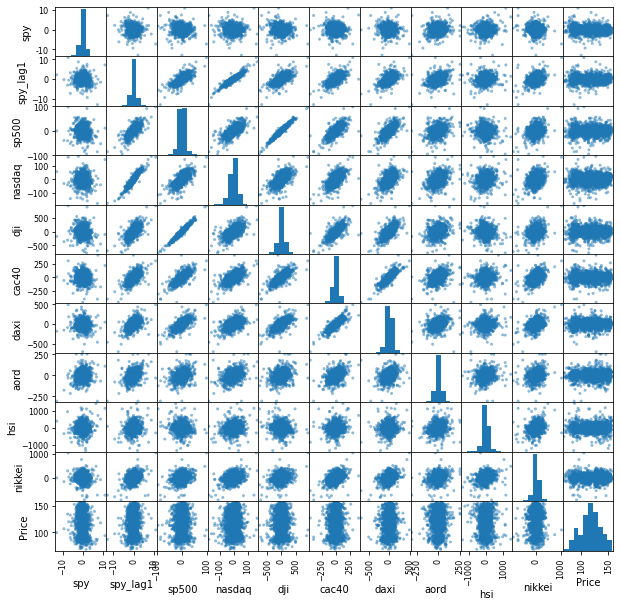

In [31]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

Check the correlation of each index between spy

In [32]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.066283
sp500      -0.078497
nasdaq     -0.047020
dji        -0.073831
cac40      -0.043948
daxi       -0.037952
aord        0.186156
hsi         0.078541
nikkei     -0.052249
Name: spy, dtype: float64


In [33]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     21.46
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           2.41e-35
Time:                        01:02:55   Log-Likelihood:                -4396.4
No. Observations:                2517   AIC:                             8813.
Df Residuals:                    2507   BIC:                             8871.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.028     -0.016      0.987      -0.055       0.054
spy_lag1      -0.1769      0.057     -3.093      0.002      -0.289      -0.065
sp500         -0.0166      0.010     -1.706      0.088      -0.036       0.002
nasdaq         0.0051      0.003      1.844      0.065      -0.000       0.010
dji            0.0012      0.001      1.208      0.227      -0.001       0.003
cac40         -0.0006      0.001     -0.598      0.550      -0.003       0.001
aord           0.0091      0.001     12.006      0.000       0.008       0.011
daxi        7.276e-05      0.001      0.104      0.917      -0.001       0.001
nikkei        -0.0010      0.000     -4.000      0.000      -0.001      -0.000
hsi            0.0005      0.000      3.323      0.001       0.000       0.001
==============================================================================
Omnibus:                      308.402   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2951.569
Skew:                          -0.172   Prob(JB):                         0.00
Kurtosis:                       8.294   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Make prediction

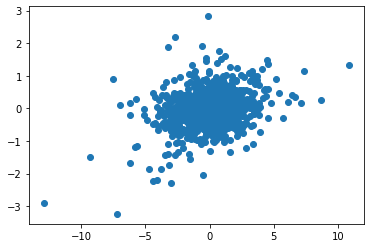

In [39]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)
plt.scatter(Train['spy'], Train['PredictedY'])

Model evaluation - Statistical standard

In [36]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [40]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [38]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'spy')
# If Root Mean Square Error(RMSE) adjusted R^2 in train and test differ dramatically, 
# then the model is overfitting.

,Train,Test
R2,0.068202,0.03732
RMSE,1.390578,2.53755


Profit of Signal-based strategy:    
Buy 1 share if Predicted Value > 0   
Sell 1 share(if have) and short sell 1 share if Predicted Value<0

In [45]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  536.6096725463867


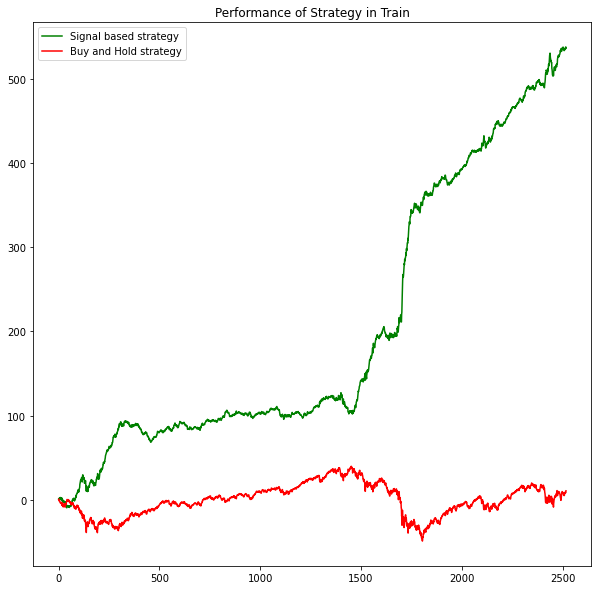

In [46]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [47]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  573.0301132202148


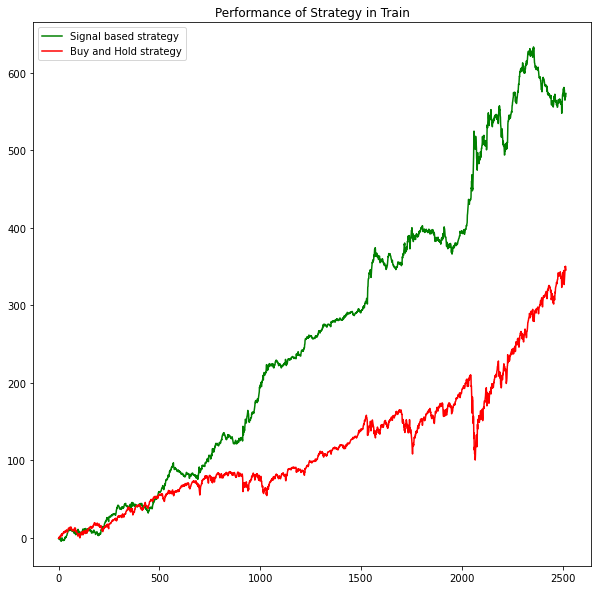

In [48]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

Evaluation of model - Practical Standard

In [49]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [57]:
# Sharpe Ratio for both Train and Test
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr_Train = Train['Return'].dropna()
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr_Test = Test['Return'].dropna()

print('Daily Sharpe Ratio(Train) is ', dailyr_Train.mean()/dailyr_Train.std(ddof=1))
print('Yearly Sharpe Ratio(Train) is ', (252**0.5)*dailyr_Train.mean()/dailyr_Train.std(ddof=1))
print('Daily Sharpe Ratio(Test) is ', dailyr_Test.mean()/dailyr_Test.std(ddof=1))
print('Yearly Sharpe Ratio(Test) is ', (252**0.5)*dailyr_Test.mean()/dailyr_Test.std(ddof=1))

Daily Sharpe Ratio(Train) is  0.12003519190815318
Yearly Sharpe Ratio(Train) is  1.905499598189316
Daily Sharpe Ratio(Test) is  0.10899727152672854
Yearly Sharpe Ratio(Test) is  1.7302780442658314


In [58]:
# Maximum Drawdown in Train data
# (The maximum percentage decline in the strategy from historical peak profit at each point in time)
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.13551462576132717


In [59]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.11252603418458869


In [60]:
Train.to_csv(r'C:/data/Train.csv')
Test.to_csv(r'C:/data/Test.csv')